##Naive Bayes Classifier:
- Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data.
- Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems.
- It uses the Bayes theorem of probability to predict the class.

**Bayes Theorem of Probability:**

P(A/B) = (P(B/A) * P(A)) / P(B)

P(A/B) : probability of event A knowing B has occurred. (Conditional Probability)

P(B/A) : probability of event B given event A.


- Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence

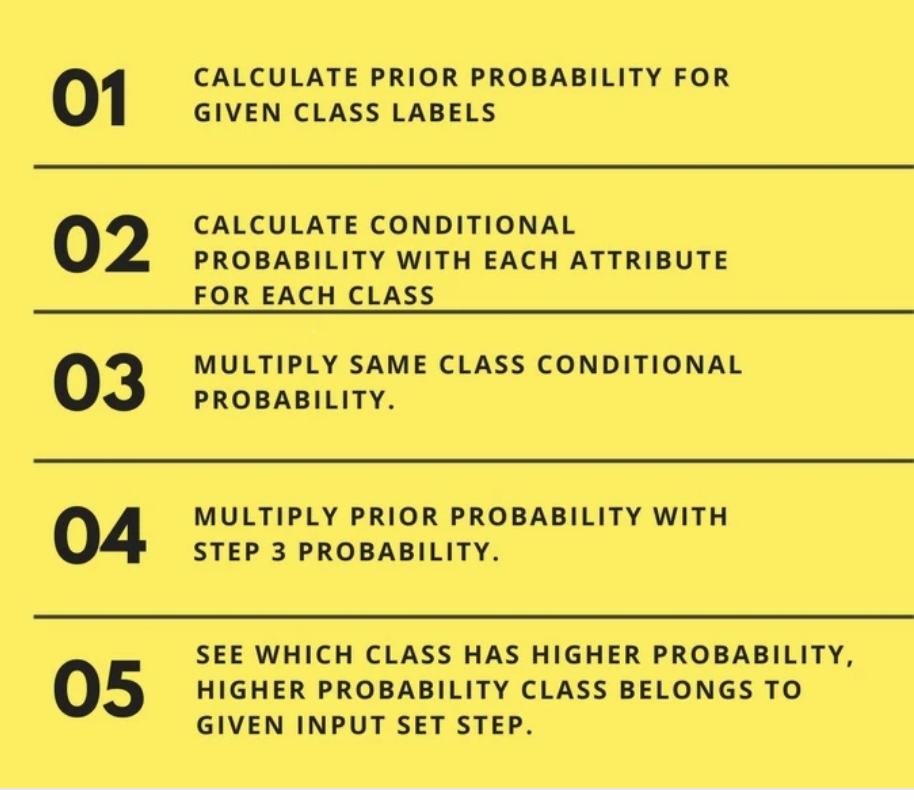


P(Q) = 1/13, P(Q given D) = 1/13

P(Q|D) = P(D|Q) * P(Q) / P(D)

      = 1/4 * 1/13 / 1/4
      = 1/13

####Loading Data and Preprocessing:

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load the data
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#creating whole dataset
titanic = pd.concat([train_data,test_data], ignore_index = True )
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#dropping columns
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis ='columns',
             inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0.0,3,male,22.0,7.2500
1,1.0,1,female,38.0,71.2833
2,1.0,3,female,26.0,7.9250
3,1.0,1,female,35.0,53.1000
4,0.0,3,male,35.0,8.0500


In [6]:
titanic.isna().any()

Survived     True
Pclass      False
Sex         False
Age          True
Fare         True
dtype: bool

In [8]:
titanic.Survived = titanic.Survived.fillna(titanic.Survived.mode())
titanic.Age = titanic.Age.fillna(titanic.Age.mean())
titanic.Fare = titanic.Fare.fillna(titanic.Fare.mean())

In [9]:
titanic.isna().any()

Survived     True
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [10]:
titanic = titanic.dropna()


In [11]:
titanic.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [12]:
inputs = titanic.drop('Survived', axis = 'columns')
target = titanic.Survived

In [13]:
#treating text data
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
inputs = pd.concat([inputs,dummies],axis ='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [15]:
#drop the male columns
inputs.drop(['Sex','male'],axis ='columns', inplace = True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


#### Model Building:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size = 0.3,
                                                    stratify = target, random_state = 0)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred = model.predict(X_test)

In [37]:
model.predict([[2,25,10,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

In [38]:
print('Actual Value:',y_test[6])
print('Predicted:',y_pred[6])

Actual Value: 0.0
Predicted: 0.0


Type of Naive Bayes Classifiers:
- GaussianNB:
    - Assumes that the features follow a normal distribution (Gaussian distribution).
    - Suitable for continuous data.
- MultinomialNB:
    - Assumes that the features are discrete and follow a multinomial distribution.
    - Commonly used for document classification tasks, where each feature represents the frequency of a term in a document.
-BernoulliNB:
    - Assumes that features are binary (i.e., they take on only two values, typically 0 or 1).
    - Suitable for binary classification problems.

####Model Evaluation:

In [39]:
model.score(X_test,y_test)

0.7985074626865671

In [40]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7985074626865671
F1 Score: 0.7992958961639306


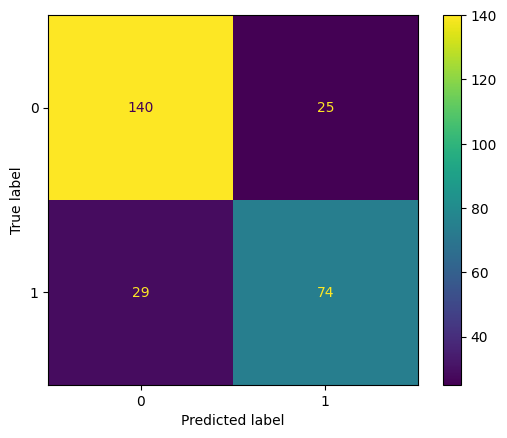

In [41]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();